In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist.train.images.shape
#Each row is an image

(55000, 784)

In [7]:
type(mnist.train.images)

numpy.ndarray

In [16]:
#Sample an image and convert it as 28x28 Matrix
sample=mnist.train.images[200].reshape(28,28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

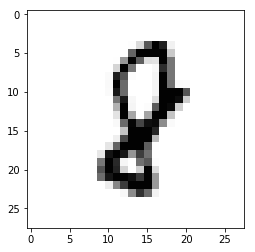

In [17]:
#Plot an image using matplotlib
plt.imshow(sample,cmap='Greys')

In [93]:
learning_rate = 0.001
training_epochs = 50
batch_size=100

In [94]:
n_classes = 10
samples = 55000 

In [95]:
n_input= 28*28

In [96]:
n_hidden1 = 256
n_hidden2 = 256

In [97]:
def multilayer_perceptron(x,weights, biases):
    """
    x: PLaceholder for Input Array
    weights: Dict of weights
    biases: Dict of biases
    """
    #Layer 1 - Set up the layer 1 and activiation fn
    layer1 = tf.matmul(x,weights['h1']) + biases['b1']
    layer1 = tf.nn.relu(layer1)
    
    #Layer 2 - Set up the layer 2 and activiation fn
    layer2 = tf.matmul(layer1,weights['h2']) + biases['b2']
    layer2 = tf.nn.relu(layer2)
    
    #Output Layer 
    out = tf.matmul(layer2,weights['out']) + biases['out']
        
    return out

In [98]:
#Dict for weights
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_hidden2, n_classes]))
}

In [99]:
#Dict for Biases
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [100]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [101]:
pred = multilayer_perceptron(x,weights,biases)

In [102]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training

In [103]:
t = mnist.train.next_batch(1)

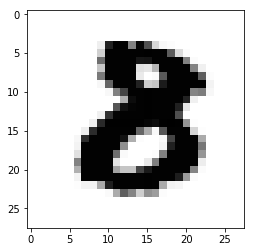

In [104]:
plt.imshow(t[0].reshape(28,28), cmap='Greys')

In [105]:
t[1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

## Run the Session

In [106]:
sess = tf.InteractiveSession()

In [107]:
init = tf.global_variables_initializer()

In [108]:
sess.run(init)

In [109]:
# Actual training
#Loop for no of epochs
for i in range(training_epochs):
    avg_cost = 0.0
    
    batches = int(samples/batch_size)
    
    # Loop for no of batches
    for j in range(batches):
        x_tr, y_tr = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([opt,cost],feed_dict={x:x_tr, y:y_tr})
        
        avg_cost = avg_cost + c/batch_size
        
    print("Cost for epoch {} is {}", i+1, avg_cost)

print("Training complete")

('Cost for epoch {} is {}', 1, 838.09607152938725)
('Cost for epoch {} is {}', 2, 216.30289814472215)
('Cost for epoch {} is {}', 3, 135.48922590434566)
('Cost for epoch {} is {}', 4, 93.585531693100876)
('Cost for epoch {} is {}', 5, 67.878875721990994)
('Cost for epoch {} is {}', 6, 50.438626184913872)
('Cost for epoch {} is {}', 7, 36.47918306463292)
('Cost for epoch {} is {}', 8, 27.948178034126499)
('Cost for epoch {} is {}', 9, 20.127316808290516)
('Cost for epoch {} is {}', 10, 15.48913040010286)
('Cost for epoch {} is {}', 11, 11.802850923144138)
('Cost for epoch {} is {}', 12, 8.6563557465330252)
('Cost for epoch {} is {}', 13, 6.7778088996768817)
('Cost for epoch {} is {}', 14, 5.360316066781345)
('Cost for epoch {} is {}', 15, 4.0948335226473658)
('Cost for epoch {} is {}', 16, 3.9598348278207123)
('Cost for epoch {} is {}', 17, 2.8890373201322004)
('Cost for epoch {} is {}', 18, 2.6930742398175722)
('Cost for epoch {} is {}', 19, 2.8016639832829489)
('Cost for epoch {} is {

## Model Evaluation

In [110]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [111]:
correct_pred[0]

<tf.Tensor 'strided_slice_3:0' shape=() dtype=bool>

In [112]:
correct_pred = tf.cast(correct_pred, 'float')

In [113]:
correct_pred[0]

<tf.Tensor 'strided_slice_4:0' shape=() dtype=float32>

In [114]:
accuracy = tf.reduce_mean(correct_pred)

In [115]:
print(accuracy)

Tensor("Mean_6:0", shape=(), dtype=float32)


In [116]:
#Find accuracy using test set
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9598